In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


import xgboost




from collections import Counter

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
numerical_feats = train.dtypes[train.dtypes != "object"].index 
print("Number of numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index 
print("Number of categorical features: ", len(categorical_feats))

Number of numerical features:  2
Number of categorical features:  8


In [4]:
num_strong_corr = ['pretest']

num_weak_corr = ['n_student']

catg_strong_corr = ['lunch', 'school', 'classroom', 'school_setting']

catg_weak_corr = ['gender', 'teaching_method']

In [5]:
std_id_test = test['student_id']

to_drop_num = num_weak_corr
to_drop_catg = catg_weak_corr

cols_to_drop = ['student_id'] + to_drop_num + to_drop_catg

for df in [train, test]:
    df.drop(cols_to_drop, inplace = True, axis = 1)

In [6]:
y = train.pretest
X = train.drop(['pretest'], axis=1)

In [7]:
s = (X.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['school', 'school_setting', 'school_type', 'classroom', 'lunch']

In [8]:
label_X = X.copy()
label_test = test.copy()
ordinal_encoder = OrdinalEncoder()
label_X[object_cols] = ordinal_encoder.fit_transform(X[object_cols])
label_test[object_cols] = ordinal_encoder.transform(test[object_cols])

In [9]:
X_train, X_val, y_train, y_val = train_test_split(label_X, y, test_size=0.2, random_state=3)

In [144]:


regressor = xgboost.XGBRegressor(colsample_bytree = 0.4303,
 learning_rate = 0.06,
 min_child_weight = 1.44,
 max_depth= 4, subsample = 0.5, 
 n_estimators = 3500, 
 random_state= 7, 
 )



#param = {
#'n_estimators': [2000, 2500, 3000, 3500],
#    'max_depth': [3, 4, 5, 6],
#    'min_samples_leaf': [2, 3, 4, 5, 6],
#    'min_samples_split': [2, 3, 4, 5, 6],
#    'learning_rate': [0.08, 0.06, 0.04, 0.02],

#}

#grid_re = GridSearchCV(regressor, param_grid=param, n_jobs=-1)



regressor.fit(X_train, y_train)





XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4303, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.06, max_delta_step=0, max_depth=4,
             min_child_weight=1.44, missing=nan, monotone_constraints='()',
             n_estimators=3500, n_jobs=8, num_parallel_tree=1, random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

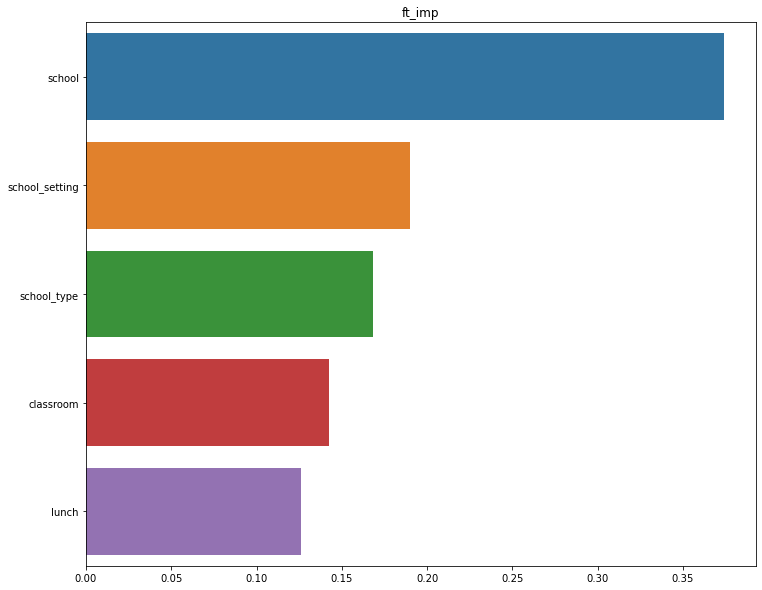

In [100]:
feature_imp = regressor.feature_importances_

ft_imp = pd.Series(feature_imp, index = X_train.columns)
ft_imp = ft_imp.sort_values(ascending=False)

plt.figure(figsize=(12, 10))
plt.title("ft_imp")
sns.barplot(x=ft_imp, y= X_train.columns)
plt.show()

In [145]:
pred = regressor.predict(X_val)
mean_absolute_error(pred, y_val)

2.5539991033007525

In [146]:
XGB_result = regressor.predict(label_test)

In [147]:
sub_xgb = pd.DataFrame()
sub_xgb['student_id'] = std_id_test
sub_xgb['pretest'] = XGB_result

sub_xgb.to_csv('xgb12.csv', index=False)